In [8]:
import pandas as pd

# Loading the Data

In [9]:
Dataset=pd.read_csv("Advertising.csv",index_col=0)

In [10]:
Dataset.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [11]:
Dataset.shape

(200, 4)

In [12]:
Dataset.size

800

# Data Preprocessing

1.Checking missing values (Null)

In [7]:
Dataset.isnull()

,TV,radio,newspaper,sales
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False
199,False,False,False,False


In [74]:
Dataset[Dataset.isnull()].count()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [75]:
#There are no null values in the Dataset
#If null values exist then replace them with mean of their column

#Dataset=Dataset.fillna(Dataset.mean())

2.Checking Outliers( outliers are data points which are far from other data points)

In [76]:
import seaborn as sb
import matplotlib.pyplot as plt

In [77]:
#checking outliers using boxplot

<AxesSubplot:xlabel='sales'>

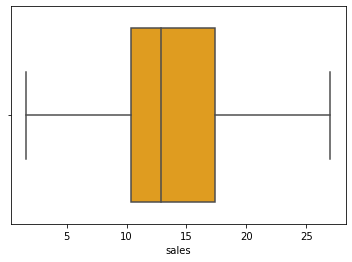

In [78]:
sb.boxplot(Dataset['sales'],color='orange')

There are no outliers in sales column

<AxesSubplot:xlabel='TV'>

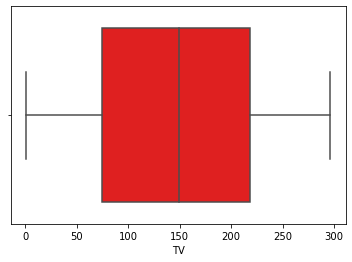

In [79]:
sb.boxplot(Dataset['TV'],color='red')

There are no outliers in TV column

<AxesSubplot:xlabel='radio'>

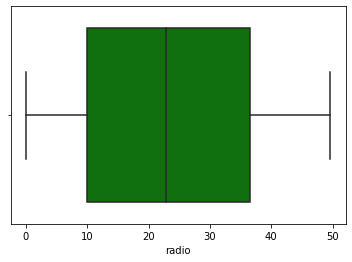

In [80]:
sb.boxplot(Dataset['radio'],color='green')

There are no outliers in radio column

<AxesSubplot:xlabel='newspaper'>

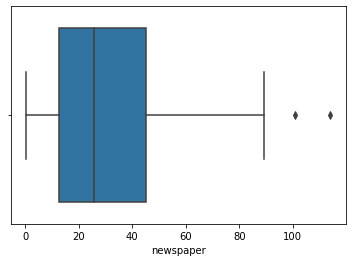

In [81]:
sb.boxplot(Dataset["newspaper"])

There are some outliers in newspaper.

In [82]:
#Removing outliers using zscore method ((xi-mean(x))/standard deviation).

In [83]:
from scipy import stats
import numpy as np

In [84]:
z=np.abs(stats.zscore(Dataset['newspaper']))

In [86]:
z

array([1.77894547, 0.66957876, 1.78354865, 1.28640506, 1.28180188,
       2.04592999, 0.32470841, 0.87248699, 1.36042422, 0.43058158,
       0.29248614, 1.22232878, 1.62704048, 1.07502697, 0.71100739,
       1.02862691, 3.84117072, 1.16211917, 0.56407384, 0.52724839,
       1.05164281, 0.32470841, 0.87672192, 0.20042252, 0.56407384,
       0.50883567, 0.82645518, 0.3523275 , 0.3523275 , 0.47164196,
       0.58211831, 0.37037197, 0.02550162, 1.39264649, 1.06582061,
       1.01518562, 1.17629696, 0.69719785, 0.20926062, 0.066562  ,
       0.04814928, 0.37497515, 1.32359877, 0.19121615, 0.5867215 ,
       0.0435461 , 0.23687971, 0.55486748, 0.89053147, 0.28751471,
       0.18624472, 1.2407415 , 0.41640379, 1.29561142, 0.6745502 ,
       1.35545278, 0.49926105, 0.64232793, 0.32894334, 0.97836017,
       0.42137522, 1.11148417, 0.14978752, 1.0197888 , 0.07613662,
       1.3650274 , 1.30518604, 0.93693153, 0.90010608, 0.1543907 ,
       0.37497515, 0.05275246, 0.51804203, 0.03433973, 0.80343

In [87]:
#way ro remove all outliers in total dataset at once.
#Dataset=Dataset[(z<3).all(axis=1)]

In [88]:
#Removing outliers in newspaper Column.
# Zscore greater than 3  is considered to be an outlier
Dataset=Dataset[np.abs(Dataset['newspaper']-Dataset['newspaper'].mean()) / Dataset['newspaper'].std() <3]

In [89]:
Dataset.shape

(198, 4)

<AxesSubplot:xlabel='newspaper'>

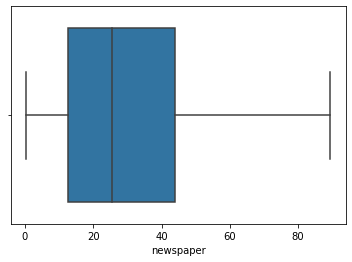

In [90]:
sb.boxplot(Dataset["newspaper"])

In [91]:
# As we can see that two rows are removed 

In [92]:
Dataset

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [93]:
#Data Selection

In [94]:
Dataset.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


In [95]:
#Target variable is sales i.e dependent variable
y_dep=Dataset['sales']

In [96]:
x_indep=Dataset[['TV','radio','newspaper']]

In [97]:
x_indep.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


# The intuition behind multiple Linear regression is :
y= (C + M * X1) + (C + M * x2) + ( C + M * X3) ...
where y--dependent variable.
      C--intercept.
      M--coefficient.
      X1,X2,X3 -- independent variables.


# Splitting the Dataset into training and testing

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
xtrain_data,xtest_data,ytrain_data,ytest_data = train_test_split(x_indep,y_dep,test_size=0.4,random_state=1)
# 40% testing dataset and 60% training dataset.


# Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
LR=LinearRegression()


# Training the Algorithm

In [102]:
LR.fit(xtrain_data, ytrain_data)

LinearRegression()

In [103]:
xtrain_data.shape

(118, 3)

training data --> 60% of 198 i.e 118 rows 

In [104]:
print('The incercept value is ',LR.intercept_)

The incercept value is  3.200552039344826


In [105]:
coefficients = pd.DataFrame(LR.coef_, x_indep.columns, columns=['Coefficient'])

In [106]:
coefficients

,Coefficient
TV,0.045605
radio,0.182954
newspaper,-0.004961


In [107]:
predic_y= LR.predict(xtest_data)

In [108]:
predic_y

array([12.2149529 , 17.19132832, 17.16591701,  4.61556392, 23.03669121,
       18.52322577, 12.82320218, 13.13212482, 21.52157606, 18.0736646 ,
       20.37122393, 14.19603462, 17.36303672, 17.35299533,  9.85711398,
        6.90191825,  7.26304108, 23.36115698, 14.01896772, 18.16056801,
       20.50222617, 23.00198387, 15.14620102, 10.60582608,  7.75896346,
        9.81470385, 20.33713671,  9.14511682, 12.11593187, 19.39155991,
       16.20514784, 10.78879228,  5.90016257,  9.90191844, 18.36141459,
       19.20821969,  9.79837674, 16.12271329,  9.7848902 , 14.31851556,
       19.74229225,  3.74414876, 12.84233641, 18.29953312, 12.76742713,
       17.96361117, 17.36837339, 16.35869593, 11.6199416 ,  9.2076809 ,
       16.16676759,  9.59418948,  7.68744675,  7.78438873, 18.76833785,
       23.82739698, 15.05186179, 15.31575477, 24.56769389, 19.00388361,
       10.42213868, 23.89730555, 14.04209605, 10.01619537, 12.17166542,
       23.48980619, 17.68693125,  8.20952072, 12.15558133, 21.01

In [109]:
df = pd.DataFrame({'Actual': ytest_data, 'Predicted': predic_y})

In [110]:
df.head(60)

,Actual,Predicted
178,11.7,12.214953
42,17.1,17.191328
36,12.8,17.165917
92,7.3,4.615564
148,25.4,23.036691
185,17.6,18.523226
97,11.7,12.823202
5,12.9,13.132125
31,21.4,21.521576
170,15.0,18.073665


In [65]:
from sklearn import metrics

## Measuring the performance

rsquare value indicates how well a regression model fits a dataset accurately

In [111]:
from sklearn.metrics import r2_score
r2_score(ytest_data,predic_y)

0.9079954450266731

Hence 90% of our model is Fit 